In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, levene
import scipy.stats as stats


In [ ]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value. 
# If the p-value is greater than your chosen significance level (α = 0.05), 
# you can assume the data comes from a normally distributed population. 
# If the p-value is less than or equal to the significance level, the normality assumption is not met, 
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.

desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)
print(f"Shaipro wilik desktop: {shapiro_desktop}")
print(f"Shaipro wilik mobile: {shapiro_mobile}")

Shaipro wilik desktop: ShapiroResult(statistic=np.float64(0.9783115512411942), pvalue=np.float64(0.7791003299808725))
Shaipro wilik mobile: ShapiroResult(statistic=np.float64(0.9714355768676655), pvalue=np.float64(0.5791606602037616))


In [5]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met, 
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

levene_test = levene(desktop_users, mobile_users)
print(f"Levene's test: {levene_test}")

Levene's test: LeveneResult(statistic=np.float64(2.94395488191752), pvalue=np.float64(0.09153720526741756))


In [6]:
# Dependent 2 sample t-test (Paired t-test)
# The paired t-test is used when you have two related samples, such as measurements taken from the same group of subjects before and after an intervention.
# The paired t-test compares the means of the two related groups to determine if there is a statistically significant difference between them.

# our H0: There is no significant difference in the mean scores before and after the intervention.
# our H1: There is a significant difference in the mean scores before and after the intervention.


before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])


In [7]:
difference = after - before

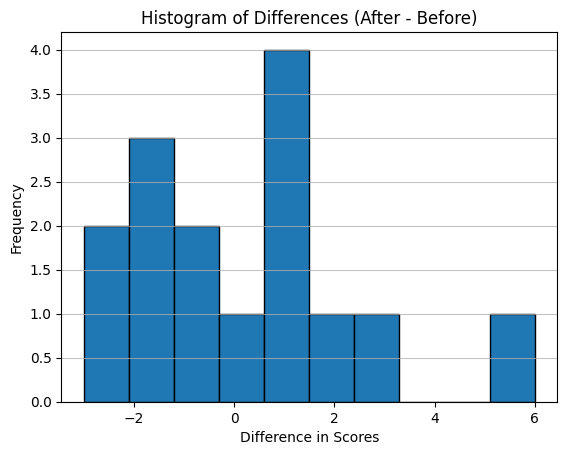

In [11]:
plt.hist(difference, bins=10, edgecolor='black')
plt.title('Histogram of Differences (After - Before)')
plt.xlabel('Difference in Scores')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
is_normal = shapiro(difference)
print(f"Shapiro-Wilk test for differences: {is_normal}")

Shapiro-Wilk test for differences: ShapiroResult(statistic=np.float64(0.9220571486009436), pvalue=np.float64(0.20704778986900568))


In [23]:
sample_mean = np.mean(difference)
sample_size = len(difference)
sample_std = np.std(difference)


t = sample_mean / (sample_std / np.sqrt(sample_size))
print(f"Paired t-test statistic: {t}")
t.dtype

Paired t-test statistic: 0.10850778933039285


dtype('float64')

In [ ]:
alpha = 0.05
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf(1 - alpha, degrees_of_freedom)
print(f"Critical value for one-tailed test at α = {alpha}: {critical_value}")
if abs(t) > critical_value:
    print("Reject the null hypothesis (H0). There is a significant difference in mean scores before and after the intervention.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in mean scores before and after the intervention.")

Critical value for one-tailed test at α = 0.05: 1.7613101357748562
Fail to reject the null hypothesis (H0). There is no significant difference in mean scores before and after the intervention.
